![header%20ipynb.png](attachment:header%20ipynb.png)

# Hands-On
---

Hands-On ini digunakan pada kegiatan Microcredential Associate Data Scientist 2021

# Tugas Mandiri Pertemuan 16
---
Pertemuan 16 (enambelas) pada Microcredential Associate Data Scientist 2021 menyampaikan materi mengenai Membangun model: Evaluasi. silakan Anda kerjakan Latihan 1 s/d 5. Output yang anda lihat merupakan panduan yang dapat Anda ikuti dalam penulisan code :)

<h1> Soal 1: Pemahaman Tentang Model Evaluasi</h1>

Jawab pertanyaan di bawah ini dengan bahasa masing-masing?

1. Apa perbedaan antara data latih, data validasi, dan data test?
2. Bagaimana cara kita menilai performa suatu model?
3. Apa itu Confusion Matrix? Jelaskan secara lengkap!
4. Apa itu Classification Report dari sklearn?


 <p style="color:#FF0000">Jawab:</p>
  
  1. Data Latih : data yang digunakan untuk training/latih model
   Data Validasi : data yang digunakan untuk proses validasi model dan mencegah overfitting
   Data test : data yang digunakan untuk testing model atau sebagai simulasi penggunaan model

2. Dengan cara menghitung akurasi model yang rumusnya prediksivalid dibagi banyaknya percobaan dikali 100%, atau bisa juga menggunakan Confusion Matrix

3. Confusion matrix sering disebut sebagai error matrix. Pada dasarnya confusion matrix memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh model dengan hasil klasifikasi sebenarnya.Confusion matrix berbentuk tabel matriks yang menggambarkan kinerja model klasifikasi pada serangkaian data uji yang nilai sebenarnya diketahui.Karakteristiknya dianatar lain: 
• Ada sumbu data aktual dan sumbu data prediksi (gunakan konvensi)
• Setiap kelas terpetakan satu sama lainnya
• Percobaan valid berada pada diagonal utama 
• Matriks berbentuk bujur sangkar

4. Classification Report adalah evaluation metric yang digunakan untuk menunjukkan atau menampilkan  presisi, daya ingat, Skor F1, dan skor dukungan dari model klasifikasi terlatih



---

<h1>Soal 2: Aplikasi Model Evaluasi</h1>

Kali ini kita akan menggunakan data untuk memprediksi kelangsungan hidup pasien yang telah mengalami operasi payudara. Dengan informasi yang dimiliki terkait pasien, kita akan membuat model untuk memprediksi apakah pasien akan bertahan hidup dalam waktu lebih dari 5 tahun atau tidak.

Lebih Lengkapnya kalian bisa membaca informasi tentang dataset di link berikut: https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.names

Buat model Klasifikasi (Model/Algoritma Bebas) untuk memprediksi status pasien dengan ketentuan sebagai berikut:

1. Bagi kedua data ini menjadi data training dan data test dengan test_size=0.25.
3. Pelajar tentang metrics roc_auc_score kemudian buatlah model dan evaluasi dengan menggunakan teknik cross-validation dengan scoring 'roc_auc'. Baca https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html untuk menggunakan metric roc_auc saat cross-validation.
3. Berapa score rata2 dari model dengan teknik cross-validation tersebut?
4. Prediksi data test dengan model yang telah kalian buat!
5. Bagaimana hasil confusion matrix dari hasil prediksi tersebut?
6. Bagaimana classification report dari hasil prediksi tersebut?
5. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status positive?
6. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status negatif?

### Load Dataset 

In [1]:
# import library pandas
import pandas as pd

# Load Dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)

In [2]:
# tampilkan 5 baris awal dataset dengan function head()
df.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
# hitung jumlah masing" data pada kolom survival_status
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

### Build Model

In [8]:
#import library train test split dan cross val
from sklearn.model_selection import train_test_split, cross_val_score

#import library Logistic regression
from sklearn.linear_model import LogisticRegression

#import library roc auc score
from sklearn.metrics import roc_auc_score

#import library scale
from sklearn.preprocessing import scale

#import library numpy
import numpy as np

In [6]:
## pemisahan feature dan target (data target : 'survival_status')
X = df.drop('survival_status', axis = 1)
Xs = scale(X)
y = df['survival_status']

#### NO 1

In [9]:
## pemisahan variabel test dan train dari data Xs dan y
# test size= 25%, random state = 42, dan stratify = y
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, random_state=42)

In [10]:
## pembuatan objek model
model_logReg = LogisticRegression(random_state = 42)

## latih model
model_logReg.fit(X_train, y_train)

## prediksi.
y_predict = model_logReg.predict(X_test)

#### NO 2

In [11]:
## menghitung cross_val_score dengan scoring = 'roc_auc'
## parameter cv = 10 
score = cross_val_score(model_logReg, X, y, scoring = 'roc_auc', cv =10)
print(score)

[0.44021739 0.80978261 0.67391304 0.69021739 0.70380435 0.79292929
 0.875      0.62784091 0.67613636 0.61363636]


#### NO 3

In [14]:
# cetak rata-rata nilai rata-rata auc score
roc_auc_score(y_test,y_predict).mean()

0.5681818181818182

#### NO 4

In [15]:
# Prediksi data test dengan model yang telah kalian buat 
auc_score = roc_auc_score(y_test, y_predict)
auc_score

0.5681818181818182

#### NO 5

In [16]:
# import library confusion matrix dan classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [17]:
# apply confusion matrix dan cetak nilai confusion matrix
cm = confusion_matrix(y_test, y_predict, labels = (1,2))
cm

array([[50,  5],
       [17,  5]])

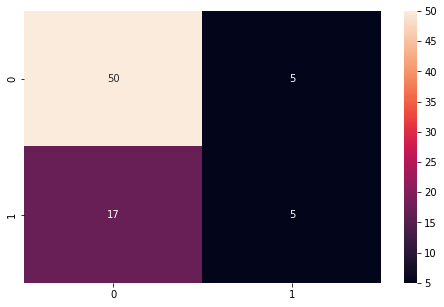

In [18]:
# visualisasikan nilai confusion matrix ke dalam diagram heatmap
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt=".0f", ax=ax)
plt.show()

#### NO 6

In [19]:
# cetak nilai classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.75      0.91      0.82        55
           2       0.50      0.23      0.31        22

    accuracy                           0.71        77
   macro avg       0.62      0.57      0.57        77
weighted avg       0.68      0.71      0.67        77



#### NO 7

- Bagaimana hasil confusion matrix dari hasil prediksi tersebut? <br>
 nilai TP: 50
 nilai FP: 5
 nilai FN: 17 
 nilai TN: 5
 
 
- Bagaimana classification report dari hasil prediksi tersebut? <br>
 menghasilkan akurasi sebesar 0.71
 
 
- Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status positive? dari hasil classification_report diatas <br>
 cukup baik dengan hasil precision dan recall pada classification report
 
 
- Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status negatif? dari hasil classification_report diatas<br>
 cukup baik dengan hasil precision dan recall pada classification report

---

<h1> Soal 3: Pemahaman Tentang Model Selection</h1>

Jelaskan dengan bahasa sendiri!

1. Apa itu Bias dan Variance?
2. Apa itu Overfitting dan Underfitting?
3. Apa yang bisa kita lakukan untuk mengatur kompleksitas dari model?
4. Bagaimana model yang baik?
5. Kapan kita menggunakan GridSearchcv dan kapan menggunakan RandomizedSearchCV?


 <p style="color:#FF0000">Jawab</p>

1. Bias adalah perbedaan antara rata rata hasil prediksi dari model
   Variance adalah variabel dari prediksi model untuk data tertentu yang memberikan kita informasi tentang perserbaran data.
2. Overfitting adalah suatu keadaan dimana data yang digunakan untuk pelatihan itu adalah yang terbaik
   Underfitting adalah keadaan dimana model pelatihan data yang dibuat tidak mewakilkan keseluruhan data yang akan digunakan nantinya
3. dapat dengan menggunakan Overfitting dan Underfitting
4. model yang mampu menjelaskan data yang ada.Biasanya kriteria ini dikaji melalui uji keserasian. 
   Salah satu ukuran yang sering digunakan untuk mendukung kriteria ini adalah koefisien determinasi (R2) 
   khususnya bila peneliti menggunakan analisis regresi linier.
5. GridSearchcv pada saat ingin memperbaiki dan mengevaluasi model dengan mencoba semua kemungkinan kombinasi parameter yang diinginkan dan menemukan yang terbaik
   RandomizedSearchCV ketika memiliki banyak parameter untuk dicoba dan waktu pelatihannya sangat lama.


---

<h1> Soal 4: Aplikasi Model Selection</h1>

1. Bagi kedua data berikut ini menjadi data training dan data test dengan test_size=0.25.
2. Import library KNN dan GridSearchCV.
3. Gunakan algoritma KNN dan fungsi GridSearchCV untuk hyperparameter tuning dan model selection.
4. jumlah fold bebas!, gunakan scoring 'roc_auc'
5. Definisikan kombinasi hyperparameter untuk model selection dengan GridSearchCV. kombinasi Hyperparameter bebas, baca lagi dokumentasi KNN di link berikut https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html untuk memahami lagi jenis2 hyperparameter di algorithma KNN.
6. Latih model terhadap data training.
7. Apa hyperparameter terbaik untuk kombinasi hyperparameter kalian?
8. Berapa score validasi terbaik dari model tersebut?
9. Prediksi probabilitasi output dari model yang telah di buat terhadap data test. note : gunakan method .predict_proba() untuk menghasilkan output probabilitas

10. Berapa nilai score roc_auc untuk data test? (y_predict)
11. Apakah model anda termasuk baik, overtting, atau underfitting?


### Load Dataset 

In [20]:
# import library pandas
import pandas as pd

# Load Dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df2 = pd.read_csv(url, names=list_cols)

In [21]:
# tampilkan 5 baris awal dataset dengan function head()
df2.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [22]:
# hitung jumlah masing" data pada kolom survival_status
df2['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

#### NO 1

In [23]:
# 1. pembagian variabel train dan test
# test size= 25%, random state = 42, dan stratify = y
X = df2.drop('survival_status', axis = 1)
y = df2['survival_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### NO 2

In [24]:
# 2. import library KNN dan GridSearchCv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#### NO 3 - 6

In [25]:
# 3. tuning hyperparameter dengan GridSearchCV (parameter cv=10)
## build model KNN
model_knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : np.arange(3,51), 'weights' : ['uniform','distance']}
gscv = GridSearchCV(model_knn, param_grid, scoring='roc_auc', cv = 10)
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

#### NO 7

In [ ]:
# 7. parameter terbaik
gscv.best_params_

{'n_neighbors': 44, 'weights': 'distance'}

#### NO 8

In [27]:
# 8. score validasi terbaik
gscv.best_score_

0.7268627450980393

#### NO 9

In [28]:
# 9. prediksikan probabilitas masing-masing data test
y_predict = gscv.predict_proba(X_test)
y_predict

array([[0.9 , 0.1 ],
       [0.95, 0.05],
       [0.8 , 0.2 ],
       [0.95, 0.05],
       [0.7 , 0.3 ],
       [0.45, 0.55],
       [0.85, 0.15],
       [0.75, 0.25],
       [0.4 , 0.6 ],
       [0.8 , 0.2 ],
       [0.9 , 0.1 ],
       [0.75, 0.25],
       [0.7 , 0.3 ],
       [0.35, 0.65],
       [0.9 , 0.1 ],
       [0.9 , 0.1 ],
       [0.9 , 0.1 ],
       [0.9 , 0.1 ],
       [0.5 , 0.5 ],
       [0.8 , 0.2 ],
       [0.8 , 0.2 ],
       [0.9 , 0.1 ],
       [0.85, 0.15],
       [0.95, 0.05],
       [0.75, 0.25],
       [0.9 , 0.1 ],
       [1.  , 0.  ],
       [0.8 , 0.2 ],
       [0.65, 0.35],
       [0.65, 0.35],
       [0.95, 0.05],
       [0.45, 0.55],
       [0.85, 0.15],
       [0.75, 0.25],
       [0.85, 0.15],
       [0.7 , 0.3 ],
       [0.7 , 0.3 ],
       [0.75, 0.25],
       [0.55, 0.45],
       [0.9 , 0.1 ],
       [0.4 , 0.6 ],
       [0.7 , 0.3 ],
       [0.4 , 0.6 ],
       [0.85, 0.15],
       [1.  , 0.  ],
       [0.8 , 0.2 ],
       [0.9 , 0.1 ],
       [0.7 ,

In [29]:
# nilai rata-rata probabilitas data test
y_predict.mean()

0.5

#### NO 10

In [37]:
# 10. nilai score roc_auc 
kurang_5th = y_predict[:,1]
print(kurang_5th)

[0.1  0.05 0.2  0.05 0.3  0.55 0.15 0.25 0.6  0.2  0.1  0.25 0.3  0.65
 0.1  0.1  0.1  0.1  0.5  0.2  0.2  0.1  0.15 0.05 0.25 0.1  0.   0.2
 0.35 0.35 0.05 0.55 0.15 0.25 0.15 0.3  0.3  0.25 0.45 0.1  0.6  0.3
 0.6  0.15 0.   0.2  0.1  0.3  0.15 0.2  0.6  0.15 0.15 0.25 0.   0.55
 0.35 0.2  0.35 0.   0.1  0.35 0.25 0.25 0.55 0.1  0.5  0.25 0.   0.45
 0.25 0.3  0.6  0.2  0.15 0.1  0.05]


#### NO 11 

 <p style="color:#FF0000">Jawab</p>


<h1> Soal 5: </h1>


1. Ulangi tahap di atas (soal 4, no 1 - 8) namun kali ini menggunakan algoritma DecisionTreeClassifier dan kalian bisa menggunakan RandomizedSearchCV apabila process training lama. pelajari algoritma DecisionTreeClassifier di linkberikut: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier
2. Bandingkan scorenya dengan Algoritma KNN, mana yang lebih baik?

Note : Data Science adalah experiment, sangat di dimungkinkan memerlukan beberapa kali percobaan untuk mendapatkan hasil yang terbaik! Happy Coding :)

#### NO 1

In [30]:
# 1. import algoritma DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [32]:
# Build model decision tree classifier 
model_tree = DecisionTreeClassifier()
params = {'criterion' : ['entropy','gini'], 'splitter' : ['best', 'random'],
         'min_samples_split' : np.arange(2,50)}
gscv = GridSearchCV(model_tree, param_grid = params, cv = 10, scoring = 'roc_auc')
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [33]:
# parameter terbaik
gscv.best_params_

{'criterion': 'gini', 'min_samples_split': 28, 'splitter': 'best'}

In [34]:
# score validasi terbaik
gscv.best_score_

0.7336274509803922

#### NO 2

 <p style="color:#FF0000">Jawab</p>
1. Algoritma Decision Tree memiliki score validasi yang lebih baik daripada algoritma KNN